In [73]:
%matplotlib inline
import seaborn
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (14, 6)

In [74]:
import numpy as np
import scipy as sp
import pandas as pd
import matplotlib.pyplot as plt
import sklearn

In [75]:
import keras

In [76]:
import numpy
print('numpy:', numpy.__version__)

import scipy
print('scipy:', scipy.__version__)

import matplotlib
print('matplotlib:', matplotlib.__version__)

import IPython
print('iPython:', IPython.__version__)

import sklearn
print('scikit-learn:', sklearn.__version__)

numpy: 1.14.3
scipy: 1.1.0
matplotlib: 2.2.2
iPython: 6.4.0
scikit-learn: 0.19.1


In [77]:
import keras
print('keras: ', keras.__version__)

# optional
import theano
print('Theano: ', theano.__version__)

import tensorflow as tf
print('Tensorflow: ', tf.__version__)

keras:  2.1.6
Theano:  1.0.1
Tensorflow:  1.8.0


In [78]:
import librosa, IPython.display as ipd
import scipy, theano as th, time, keras
from scipy.special import expit

In [79]:
from keras.models import Sequential
from keras.layers.core import Dense, Activation, Dropout # , AutoEncoder
# from keras.layers import containers
from keras.layers.noise import GaussianNoise
import keras.optimizers

In [80]:
%matplotlib inline
import seaborn
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (14, 6)

In [81]:
import librosa, IPython.display as ipd
import scipy, theano as th, time, keras
from scipy.special import expit

In [82]:
from keras.models import Sequential
from keras.layers.core import Dense, Activation, Dropout # , AutoEncoder
# from keras.layers import containers
from keras.layers.noise import GaussianNoise
import keras.optimizers

In [83]:
model = Sequential()
model.add(Dense(input_dim=2, output_dim=4, activation='relu'))
model.add(Dense(output_dim=4, activation='relu'))
model.add(Dense(output_dim=2, activation='softmax'))

C:\Users\USWU32441\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:2: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(input_dim=2, activation="relu", units=4)`
  
C:\Users\USWU32441\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:3: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", units=4)`
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\USWU32441\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:4: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="softmax", units=2)`
  after removing the cwd from sys.path.


In [84]:
optimizer = keras.optimizers.SGD(lr=0.01, momentum=0.9, nesterov=True, decay=1e-3)

In [85]:
model.compile(loss='binary_crossentropy', optimizer=optimizer)

In [86]:
X_train = scipy.randn(1000, 2)
print(X_train.shape)

(1000, 2)


In [87]:
print(X_train[:5])

[[ 0.50901692  0.49368359]
 [ 0.06660548  0.38246143]
 [ 2.28520759  0.16184507]
 [ 0.23427707 -0.99956005]
 [-1.50815088  0.40185213]]


In [88]:
y_train = scipy.array([
   [float(x[0]*x[1] > 0), float(x[0]*x[1] <= 0)]
   for x in X_train
])
print(y_train.shape)

(1000, 2)


In [89]:
y_train[:5]

array([[1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.]])

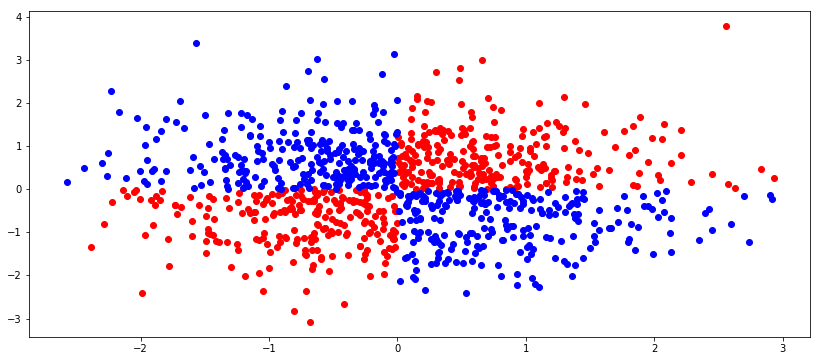

In [90]:
plt.scatter(X_train[y_train[:,0]>0.5,0], X_train[y_train[:,0]>0.5,1], c='r')
plt.scatter(X_train[y_train[:,1]>0.5,0], X_train[y_train[:,1]>0.5,1], c='b')

In [91]:
results = model.fit(X_train, y_train, nb_epoch=50, batch_size=10)

C:\Users\USWU32441\AppData\Local\Continuum\anaconda3\lib\site-packages\keras\models.py:981: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  warnings.warn('The `nb_epoch` argument in `fit` '


Epoch 1/50
1000/1000 [==============================] - 1s 699us/step - loss: 0.6521
Epoch 2/50
1000/1000 [==============================] - 0s 141us/step - loss: 0.5008
Epoch 3/50
1000/1000 [==============================] - 0s 138us/step - loss: 0.2792
Epoch 4/50
1000/1000 [==============================] - 0s 136us/step - loss: 0.1719
Epoch 5/50
1000/1000 [==============================] - 0s 135us/step - loss: 0.1316
Epoch 6/50
1000/1000 [==============================] - 0s 133us/step - loss: 0.1138
Epoch 7/50
1000/1000 [==============================] - 0s 133us/step - loss: 0.1001
Epoch 8/50
1000/1000 [==============================] - 0s 140us/step - loss: 0.0843
Epoch 9/50
1000/1000 [==============================] - 0s 135us/step - loss: 0.0822
Epoch 10/50
1000/1000 [==============================] - 0s 141us/step - loss: 0.0723
Epoch 11/50
1000/1000 [==============================] - 0s 131us/step - loss: 0.0645
Epoch 12/50
1000/1000 [==============================] - 0s 137

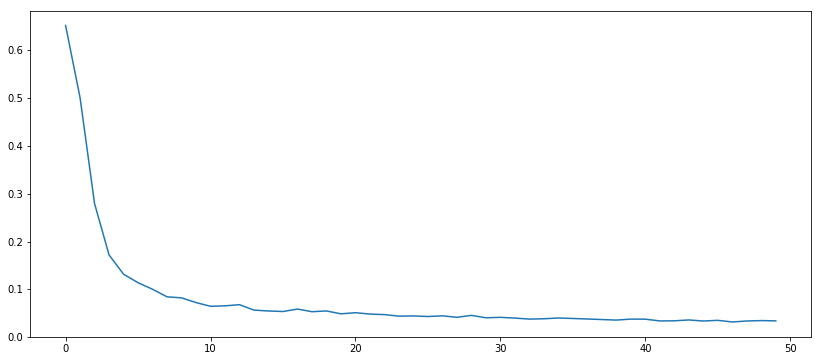

In [92]:
plt.plot(results.history['loss'])

In [93]:
X_test = scipy.randn(1000, 2)

In [94]:
y_test = model.predict(X_test)

In [95]:
y_test.shape

(1000, 2)

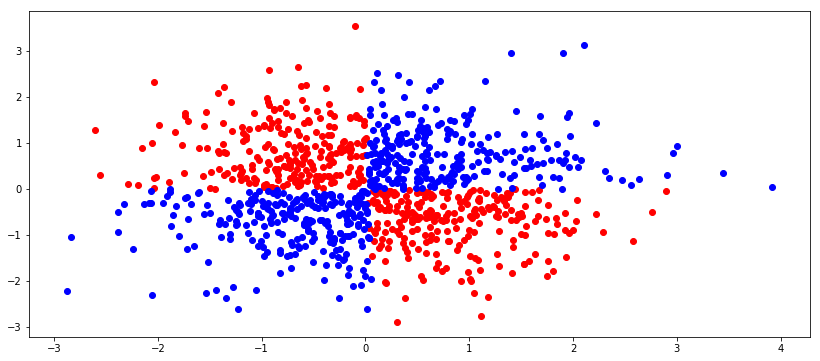

In [96]:
plt.scatter(X_test[y_test[:, 0] < 0.5,0], X_test[y_test[:, 0] < 0.5,1], c='r')
plt.scatter(X_test[y_test[:, 0] > 0.5,0], X_test[y_test[:, 0] > 0.5,1], c='b')

In [97]:
# from keras.regularizers import l1, l2, ActivityRegularizer
from keras.layers import deserialize as layer_from_config

In [98]:
model = Sequential()
model.add(AutoEncoder(
        encoder=containers.Sequential([
                #Dense(1025, 1000, activation='relu', activity_regularizer=ActivityRegularizer(l1=0.1)), 
                Dense(1025, 1000, activation='relu'), 
                #Dropout(0.7),
                Dense(1000, 30, activation='relu')
            ]),
        decoder=containers.Sequential([
                Dense(30, 1000, activation='relu'), 
                #Dropout(0.7),
                Dense(1000, 1025, activation='relu')
            ]),
        output_reconstruction=False))

NameError: name 'AutoEncoder' is not defined